In [ ]:
import csv

flows_1787 = []

CSV_FILE_INPUT = '../../../data/navigo_all_flows_1787.csv'

#and flow['destination_substate_1789_fr'] != "Colonies britanniques d'Amérique" \
            # and flow['flag'] == 'British' \
    
tonnage_cumule_total = {
    'Angleterre sans port': 0,
    'Angleterre avec port' :0
}
nb_total = {
    'Angleterre sans port': 0,
    'Angleterre avec port' :0
}

tonnage_series = {
    "Angleterre sans port": {},
    "Angleterre avec port": {},
}

tonnage_rounded_series = {
    "Angleterre sans port": {},
    "Angleterre avec port": {},
}

tonnage_class_series = {
    "Angleterre sans port": {},
    "Angleterre avec port": {},
}

with open(CSV_FILE_INPUT, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    nb_british = 0
    for flow in reader:
        if flow['departure_function'] == 'O' \
            and flow['departure'] == 'Boulogne sur Mer' \
            and flow['destination_state_1789_fr'] == 'Grande-Bretagne' \
        :
            compteur += 1
            """
            tonnage_class = flow['tonnage_class'] if flow['tonnage_class'] != '' else 'indéfini'
            #if tonnage_class == '[1-20]':
            #    tonnage_class = flow['tonnage'] if flow['tonnage'] != '' else tonnage_class
            if tonnage_class in ports[port]:
                ports[port][tonnage_class] += 1
            else:
                ports[port][tonnage_class] = 1
            """
            destination = flow["destination"]
            destination_angleterre_or_not = 'Angleterre sans port' if destination == 'Angleterre' else "Angleterre avec port"
            tonnage = int(flow['tonnage']) if flow['tonnage'] != '' else 0
            tonnage_rounded = int(tonnage) - int(tonnage % 5)
            tonnage_rounded = str(tonnage_rounded) + "-" + str(tonnage_rounded + 5)
            tonnage_class = flow['tonnage_class']
            tag = "Angleterre avec port"
            if destination == 'Angleterre':
                tonnage_cumule_total['Angleterre sans port'] += tonnage
                nb_total['Angleterre sans port'] += 1
                tag = "Angleterre sans port"
            else:
                tonnage_cumule_total['Angleterre avec port'] += tonnage
                nb_total['Angleterre avec port'] += 1
                if flow['flag'] == 'British':
                    nb_british += 1
            if tonnage in tonnage_series[tag]:
                tonnage_series[tag][tonnage] += 1
            else:
                tonnage_series[tag][tonnage] = 1
            # rounded
            if tonnage_rounded in tonnage_rounded_series[tag]:
                tonnage_rounded_series[tag][tonnage_rounded] += 1
            else:
                tonnage_rounded_series[tag][tonnage_rounded] = 1
            # class
            if tonnage_class in tonnage_class_series[tag]:
                tonnage_class_series[tag][tonnage_class] += 1
            else:
                tonnage_class_series[tag][tonnage_class] = 1
                
print("compteur : " + str(compteur))
print("tonnage cumulé : " + str(tonnage_cumule_total))
print("nombre de départs : " + str(nb_total))
print("nb british : " + str(nb_british))

In [ ]:
series = {
    "tonnage" : tonnage_series,
    "tonnage_rounded": tonnage_rounded_series,
    "tonnage_class": tonnage_class_series
}

data = {}
for name, values in series.items():
    output = []
    for group_name, group_tonnages in values.items():
        for group, count in group_tonnages.items():
            output.append({
                "series": name,
                "category": group_name,
                "group" : group,
                "count": count,
            })
    data[name] = output


In [ ]:
from IPython.display import display
import pandas as pd


def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

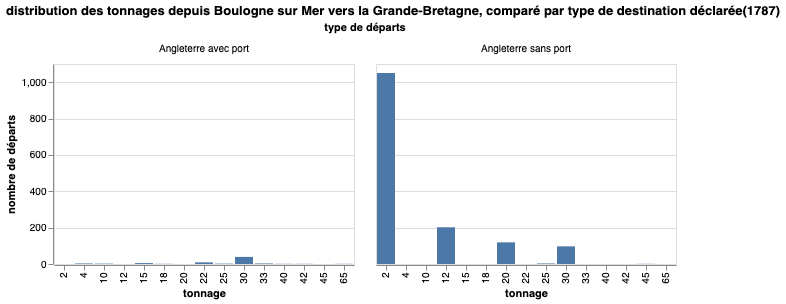

In [32]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "mark": "bar",
    "title": "distribution des tonnages depuis Boulogne sur Mer vers la Grande-Bretagne, comparé par type de destination déclarée(1787)",
  "encoding": {
    "y": {"type": "quantitative", "field": "count", "title": "nombre de départs"},
    "x": {"type": "ordinal", "field": "group", "title": "tonnage"},
    "facet": {"type": "nominal", "field": "category", "title": "type de départs"}
  }, 
 "data": {
    "values": data["tonnage"]
  }
})

In [ ]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "mark": "bar",
    "title": "distribution des tonnages (arrondis) depuis Boulogne sur Mer vers la Grande-Bretagne, comparé par type de destination déclarée(1787)",
  "encoding": {
    "y": {"type": "quantitative", "field": "count", "title": "nombre de départs"},
    "x": {"type": "ordinal", "field": "group", "title": "tonnage"},
    "facet": {"type": "nominal", "field": "category", "title": "type de départs"}
  }, 
 "data": {
    "values": data["tonnage_rounded"]
  }
})

In [ ]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "mark": "bar",
    "title": "distribution des tonnages (classés) depuis Boulogne sur Mer vers la Grande-Bretagne, comparé par type de destination déclarée(1787)",
  "encoding": {
    "y": {"type": "quantitative", "field": "count", "title": "nombre de départs"},
    "x": {"type": "ordinal", "field": "group", "title": "tonnage"},
    "facet": {"type": "nominal", "field": "category", "title": "type de départs"}
  }, 
 "data": {
    "values": data["tonnage_class"]
  }
})